## Q1. An exprement is done to test the effect of a toxic substance on insect and each of the 6 doors level 256 are exposed to the substance and the number of insects data is counted the data is tabulated as below. find the logistic equation

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
dose = np.array([1, 2, 3, 4, 5, 6])
sample_size = np.array([250, 250, 250, 250, 250, 250])
deaths = np.array([28, 53, 93, 126, 172, 197])

probability_of_death = deaths / sample_size

X = dose.reshape(-1, 1)
y = np.round(probability_of_death)  # Convert probabilities to binary outcomes (0 or 1)

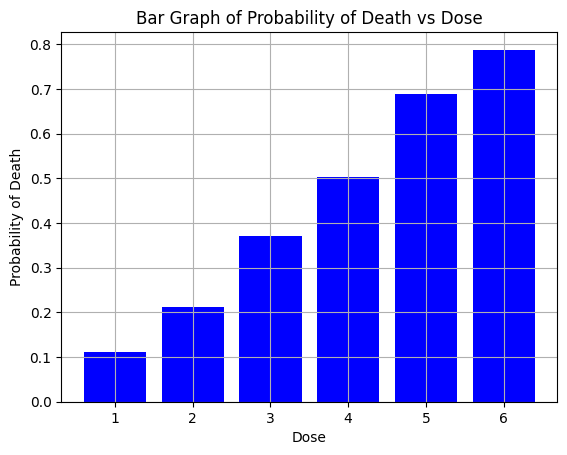

In [106]:
plt.bar(dose, probability_of_death, color='blue')

plt.xlabel('Dose')
plt.ylabel('Probability of Death')
plt.title('Bar Graph of Probability of Death vs Dose')
plt.xticks(dose)
plt.grid()
plt.show()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [108]:
beta_0 = logreg_model.intercept_[0]
beta_1 = logreg_model.coef_[0][0]

print("Intercept (beta_0):", beta_0)
print("Coefficient (beta_1):", beta_1)

y_pred = logreg_model.predict(X_test)

# classification report & confusion matrix:
print("\n\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Intercept (beta_0): -2.385044189114536
Coefficient (beta_1): 0.8189724102484274


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[2]]


In [109]:
print(f"Logistic Regression Formula: \n\nlog(p / (1 - p)) = {beta_0:.4f} + {beta_1:.4f} * dose")

Logistic Regression Formula: 

log(p / (1 - p)) = -2.3850 + 0.8190 * dose


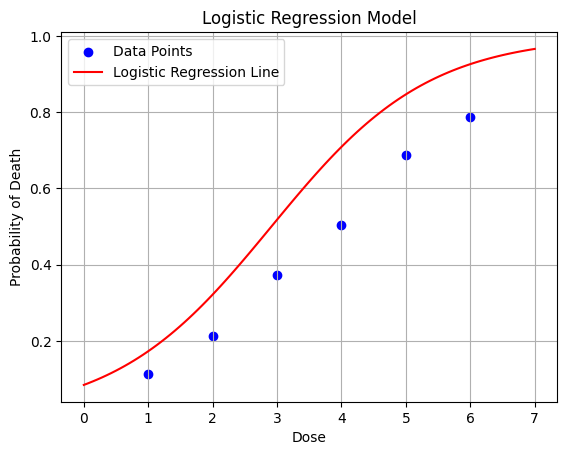

In [110]:
# Logistic regression formula
def logistic_regression_formula(x):
    return 1 / (1 + np.exp(-x))

# Plot : scatter points
plt.scatter(dose, probability_of_death, color='blue', label='Data Points')

# Plot the logistic regression line
x_vals = np.linspace(0, 7, 100)
y_vals = logistic_regression_formula(beta_0 + beta_1 * x_vals)
plt.plot(x_vals, y_vals, color='red', label='Logistic Regression Line')

plt.xlabel('Dose')
plt.ylabel('Probability of Death')
plt.title('Logistic Regression Model')
plt.legend()
plt.grid()
plt.show()

## Q3. there is a data set given which contains information of various uses obtained from the social networking site there is a car making company that has recently launched a new SUV car so the company want to check how many uses from the data set to purchase the car builder machine learning model using the logistic regression algorithm

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [114]:
data = pd.read_csv('suv_data.csv')
print("Data Shape: ",data.shape)
print(data.head())

Data Shape:  (400, 5)
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [115]:
print(data.tail())

      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1


In [116]:
# Convert Gender column to numerical values
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [117]:
print(data.tail())

      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1


In [118]:
print(data.isnull().sum())

# Select : features and target variable
X = data[['Gender', 'Age', 'EstimatedSalary']]
# X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [119]:
print("X: \n",X.head())

X: 
    Gender  Age  EstimatedSalary
0       1   19            19000
1       1   35            20000
2       0   26            43000
3       0   27            57000
4       1   19            76000


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Approch: 1  - Logistic Regression ( without Scaler )

In [121]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = (accuracy_score(y_test, y_pred)*100)
print("\n\nAccuracy:", accuracy, "\n\n")



Accuracy: 65.0 




## Approch: 2 - Logistic Regression ( with Scaler )

In [122]:
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [123]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

sy_pred = logreg_model.predict(X_test_scaled)

saccuracy = (accuracy_score(y_test, sy_pred) * 100)
print("\n\nAccuracy:", saccuracy, "\n\n")



Accuracy: 88.75 


